In [1]:
import torch
from torch import nn as nn
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision import transforms
from torch import optim

In [70]:
datapath='F:\\deeplearning\\datasets'

In [71]:
#下载，train=True是训练集，False是验证集
cifar10=datasets.CIFAR10(datapath,train=True,download=False)
cifar10_val=datasets.CIFAR10(datapath,train=False,download=False)

In [59]:
len(cifar10)

50000

In [29]:
#输出一个python image Library图像和类型
img1,label=cifar10[99]

In [32]:
img1

AttributeError: 'Image' object has no attribute 'shape'

In [30]:
img1,label

(<PIL.Image.Image image mode=RGB size=32x32>, 1)

In [8]:
img,label=cifar10[299]
img,label

(<PIL.Image.Image image mode=RGB size=32x32>, 4)

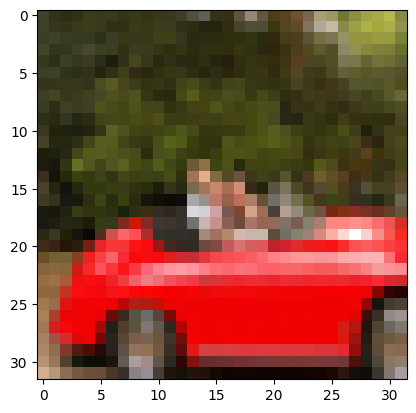

In [15]:
plt.imshow(img1)
plt.show()

In [9]:
totensor=transforms.ToTensor()
imgc = totensor(img1)
imgc.shape

torch.Size([3, 32, 32])

In [72]:
tensor_cifar10=datasets.CIFAR10(datapath,train=False,download=False,transform=transforms.ToTensor())

In [12]:
imgs=torch.stack([img for img ,_ in tensor_cifar10],dim=3)
imgs.shape

torch.Size([3, 32, 32, 10000])

In [22]:
imgs.view(3,-1).shape

torch.Size([3, 10240000])

In [13]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4942, 0.4851, 0.4504])

In [14]:
imgs.view(3,-1).std(dim=1)

tensor([0.2467, 0.2429, 0.2616])

In [15]:
a=imgs.view(3,-1).mean(dim=1)

In [16]:
b=imgs.view(3,-1).std(dim=1)

In [73]:
transforms_cifar10= datasets.CIFAR10(datapath,train=True,download=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(a, b)]))    

In [18]:
imgt,_ = tensor_cifar10[99]

TypeError: Invalid shape (3, 32, 32) for image data

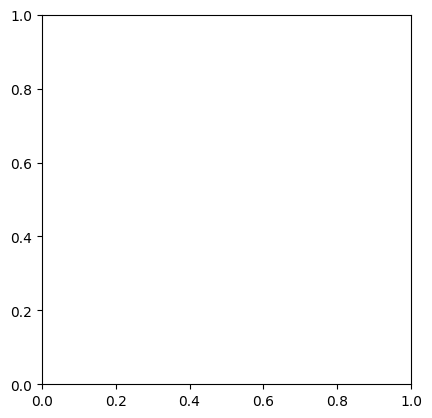

In [21]:
plt.imshow(imgt.permute(1,2,0))
plt.show()

In [24]:
model=nn.Sequential(nn.Linear(3072,512),nn.Tanh(),nn.Linear(512,10),nn.Softmax(dim=1))

In [40]:
imgs3,label=cifar10[99]

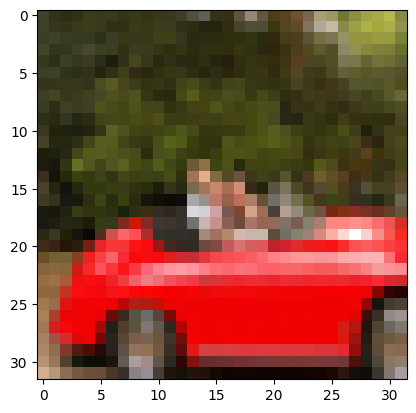

In [41]:
plt.imshow(imgs3)
plt.show()

In [27]:
imgs,_=tensor_cifar10[99]

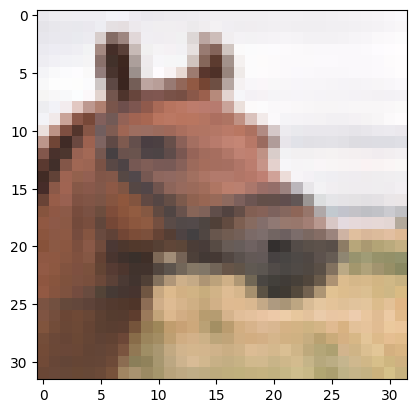

In [28]:
plt.imshow(imgs.permute(1,2,0))

In [74]:
label_map={0:0,2:1}
cifar2=[ (img,label_map[label]) for img,label in transforms_cifar10 if label in [0,2] ]

In [62]:
len(cifar2)

10000

In [75]:
train_model=nn.Sequential(nn.Linear(3072,512),nn.Tanh(),nn.Linear(512,2),nn.LogSoftmax(dim=1))

In [76]:
learning_rate = 1e-2  #超参数：学习率

In [77]:
optimizer=optim.SGD(train_model.parameters(),lr=learning_rate) #优化器

In [78]:
loss_fn=nn.NLLLoss()

In [79]:
epochs=10 #不是超参数哦

In [83]:
for epoch in range(epochs):
    for img, label in cifar2:
        out=train_model(img.view(-1).unsqueeze(0))
        print(out.shape)
        print(out,torch.tensor([label]))
        loss=loss_fn(out,torch.tensor([label]))
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'epoch:{epoch+1},loss:{loss.item()}')

torch.Size([1, 2])
tensor([[-3.9873, -0.0187]], grad_fn=<LogSoftmaxBackward0>) tensor([1])
tensor(0.0187, grad_fn=<NllLossBackward0>)
torch.Size([1, 2])
tensor([[-0.3302, -1.2686]], grad_fn=<LogSoftmaxBackward0>) tensor([1])
tensor(1.2686, grad_fn=<NllLossBackward0>)
torch.Size([1, 2])
tensor([[-3.4151, -0.0334]], grad_fn=<LogSoftmaxBackward0>) tensor([1])
tensor(0.0334, grad_fn=<NllLossBackward0>)
torch.Size([1, 2])
tensor([[-7.5264e+00, -5.3880e-04]], grad_fn=<LogSoftmaxBackward0>) tensor([1])
tensor(0.0005, grad_fn=<NllLossBackward0>)
torch.Size([1, 2])
tensor([[-1.5962, -0.2265]], grad_fn=<LogSoftmaxBackward0>) tensor([0])
tensor(1.5962, grad_fn=<NllLossBackward0>)
torch.Size([1, 2])
tensor([[-0.1363, -2.0605]], grad_fn=<LogSoftmaxBackward0>) tensor([0])
tensor(0.1363, grad_fn=<NllLossBackward0>)
torch.Size([1, 2])
tensor([[-3.3964, -0.0341]], grad_fn=<LogSoftmaxBackward0>) tensor([0])
tensor(3.3964, grad_fn=<NllLossBackward0>)
torch.Size([1, 2])
tensor([[-2.1369e-03, -6.1495e+00]]

KeyboardInterrupt: 

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, 
 shuffle=True)